<a href="https://colab.research.google.com/github/MatthewB11/DigitPrediction/blob/main/DigitPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from tensorflow.keras.datasets import mnist
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Flatten the 28x28 images into 784 features
X_train_flat = X_train.reshape(X_train.shape[0], 784)
X_test_flat = X_test.reshape(X_test.shape[0], 784)

# Split training data into training and validation sets (80-20 split)
split_idx = int(0.8 * len(X_train_flat))
X_val_flat = X_train_flat[split_idx:]
y_val = y_train[split_idx:]
X_train_flat = X_train_flat[:split_idx]
y_train = y_train[:split_idx]

# Create DataFrames with feature columns named pixel0 to pixel783
# Add label column at the end
def create_df(X, y):
    df = pd.DataFrame(X, columns=[f'pixel{i}' for i in range(784)])
    df['label'] = y
    return df

# Create DataFrames
train_df = create_df(X_train_flat, y_train)
val_df = create_df(X_val_flat, y_val)
test_df = create_df(X_test_flat, y_test)

# Save to CSV files
train_df.to_csv('mnist_train.csv', index=False)
val_df.to_csv('mnist_validation.csv', index=False)
test_df.to_csv('mnist_test.csv', index=False)

print("Data saved to CSV files:")
print(f"Training set shape: {train_df.shape}")
print(f"Validation set shape: {val_df.shape}")
print(f"Test set shape: {test_df.shape}")

#Prepping data
#X for input dataset without label column
X_train = train_df.drop(columns = ['label'])
X_val = val_df.drop(columns = ['label'])
X_test = test_df.drop(columns = ['label'])

#Normalizing the pixel values from 0-255 to 0-1
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

#y for output dataset, only column "label"
y_train = train_df['label']
y_val = val_df['label']
y_test = test_df['label']

#Applying data to Support Vector Machine (SVM)
svm = SVC(kernel='rbf', random_state=42)
svm = svm.fit(X_train, y_train)



predictions = svm.predict(X_val)
accuracy = accuracy_score(y_val, predictions)
print(f"\nAccuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_val, predictions))


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Data saved to CSV files:
Training set shape: (48000, 785)
Validation set shape: (12000, 785)
Test set shape: (10000, 785)

Accuracy: 0.9786

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1194
           1       0.99      0.99      0.99      1272
           2       0.98      0.98      0.98      1196
           3       0.98      0.97      0.97      1242
           4       0.98      0.98      0.98      1187
           5       0.97      0.96      0.97      1097
           6       0.98      0.99      0.99      1170
           7       0.98      0.98      0.98      1297
           8       0.97      0.98      0.97      1198
           9       0.97      0.97      0.97      1147

    accuracy                           0.98     12000
   macro avg       0.98      0.98      0.98     12000
weighted avg       0.98      0.98      0.98     12000



In [ ]:
import random

def random_digit_viewer(model, X_test, y_test):
    # Create button
    button = widgets.Button(description='Show Test Digit')
    output = widgets.Output()

    def show_random_digit(_):
        # Clear previous output
        output.clear_output(wait=True)

        # Generate random index
        index = random.randint(0, len(X_test)-1)

        with output:
            # Get the image and predictions
            image = X_test.iloc[index, :784].values.reshape(28, 28)
            prediction = model.predict(X_test.iloc[[index], :784])[0]
            actual = y_test.iloc[index]

            # Create the plot
            plt.figure(figsize=(10, 4))

            # Plot the digit
            plt.subplot(1, 2, 1)
            plt.imshow(image, cmap='gray')
            plt.title('MNIST Digit')
            plt.axis('off')

            # Plot prediction info
            plt.subplot(1, 2, 2)
            plt.text(0.1, 0.6, f'Model Prediction: {prediction}', fontsize=12)
            plt.text(0.1, 0.4, f'Actual Digit: {actual}', fontsize=12)
            plt.text(0.1, 0.2, f'Correct: {prediction == actual}',fontsize=12,
                    color='green' if prediction == actual else 'red')
            plt.axis('off')

            plt.show()

    # Attach the function to the button
    button.on_click(show_random_digit)

    # Display button and output area
    display(button, output)

    # Show first random digit
    show_random_digit(None)

In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
import numpy as np
import random

random_digit_viewer(svm, X_test, y_test)

Button(description='Show Test Digit', style=ButtonStyle())

Output()

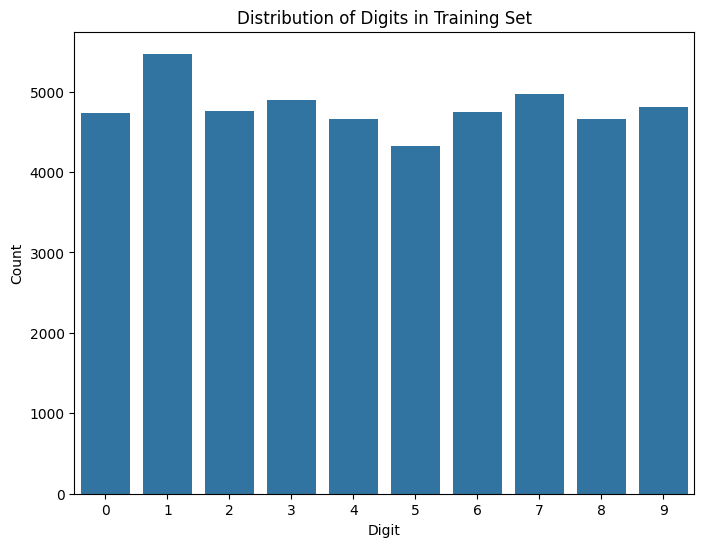

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the occurrences of each digit in the training set
digit_counts = y_train.value_counts().sort_index()

# Create the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=digit_counts.index, y=digit_counts.values)
plt.title('Distribution of Digits in Training Set')
plt.xlabel('Digit')
plt.ylabel('Count')
plt.show()

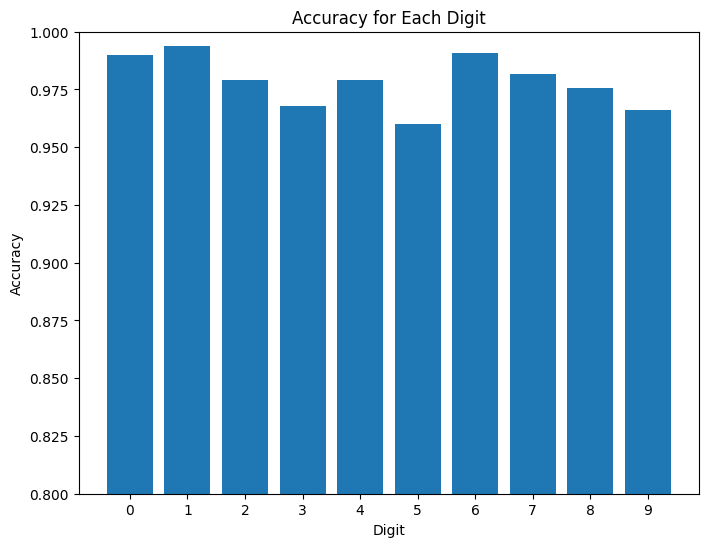

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score

# Get the model's predictions on the validation set
predictions = svm.predict(X_val)

# Calculate accuracy for each digit
digit_accuracies = []
for digit in range(10):
    digit_indices = y_val[y_val == digit].index
    digit_predictions = predictions[digit_indices]
    digit_accuracy = accuracy_score(y_val[digit_indices], digit_predictions)
    digit_accuracies.append(digit_accuracy)

# Create the bar plot
plt.figure(figsize=(8, 6))
plt.bar(range(10), digit_accuracies)
plt.title('Accuracy for Each Digit')
plt.xlabel('Digit')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1.0)
plt.xticks(range(10))
plt.show()

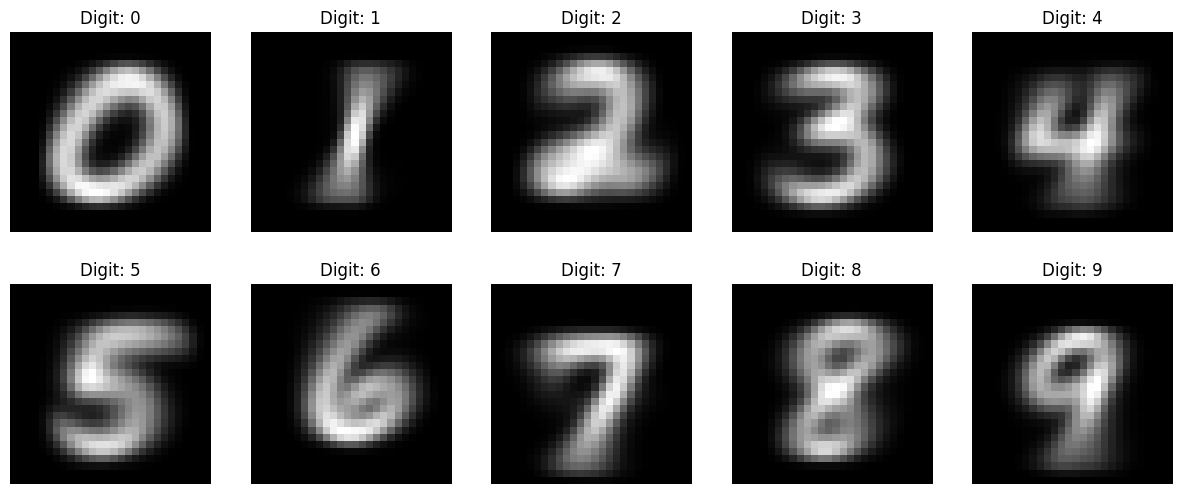

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the average pixel values for each digit (same as before)
average_pixels = []
for digit in range(10):
    digit_indices = y_train[y_train == digit].index
    average_image = X_train.loc[digit_indices].mean().values.reshape(28, 28)
    average_pixels.append(average_image)

# Create a grid of images
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for digit, ax in enumerate(axes.flat):
    ax.imshow(average_pixels[digit], cmap='gray')
    ax.set_title(f'Digit: {digit}')
    ax.axis('off')

plt.show()